# Problem Set 11 Code

In [4]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Finding Signals in Noise

In [5]:
# Run this first
%matplotlib inline  
import numpy as np
import scipy as sp
import scipy.linalg as la
import pylab as plt
import numpy.random

N = 1000

def rand_vector(n): # returns a random {+1, -1} vector of length n
    return np.random.randint(2, size=n)*2 - 1.0

def rand_normed_vector(n): # returns a random normalized vector of length n
    x = rand_vector(n)
    return x / la.norm(x)

def cross_corr(f, g):
    # returns the cross-correlation (a vector of all the inner products of 'g' with shifted versions of 'f')
    C = la.circulant(f)
    corr = C.T.dot(g)
    return corr

# (a)

-0.064
-0.064


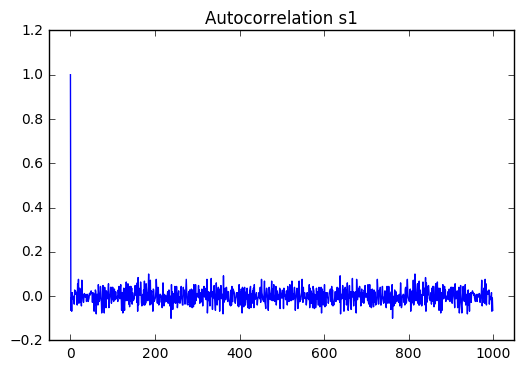

In [9]:
# generate a random normalized vector for s1
# (running this cell again will generate a new random vector)
s1 = rand_normed_vector(N)

# compute all the inner products of s1 with shifted versions of s1
# (ie, the cross-correlation of s1 with s1)
corr = cross_corr(s1, s1)

# The inner prouct <s1, s1^(1)> is:
print(corr[1])

# np.roll circularly shifts the signal
# so the above inner product could be computed as:
print(np.dot(s1, np.roll(s1,1)))

# Plot the autocorrelation:
plt.title("Autocorrelation s1")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])

plt.show()

# (b)

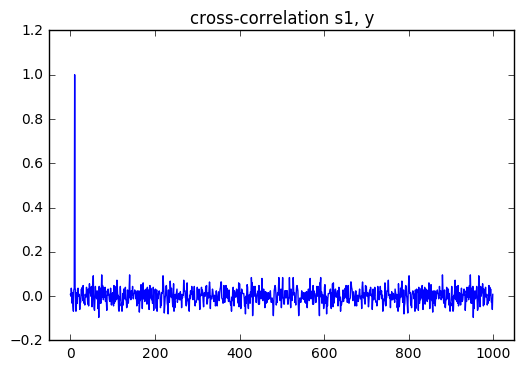

10


In [16]:
y = np.roll(s1, 10) # Received y = s1 shifted by 10

# Compute the cross-correlation (all the inner products of y with shifted versions of s1)
corr = cross_corr(s1, y)

# Plot
plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
print(np.argmax(corr))

# (c)

In [17]:
# generate a random normalized vector for s1,
# and a random normalized vector for n
# (running this cell again will generate new random vectors)
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)

print(np.abs(np.dot(s1, n)))

0.016


# (d)

This is the code from part (b), but with the received signal $\vec{y}$, which is corrupted by noise.

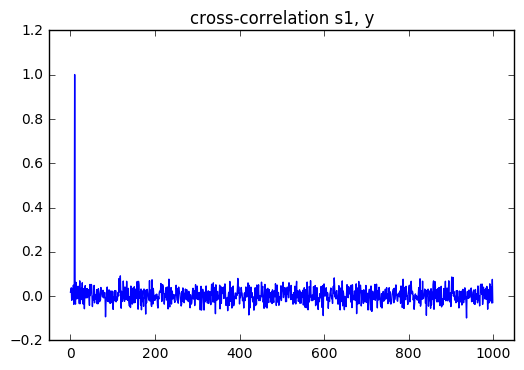

10

In [18]:
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 0.1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)

# (e)
Copy the code provided for part (d), but modify it appropriately, so that the noise is higher.
You should generate two cross-correlation plots, one for each noise level in the question.
(You can just copy the code from part (d) twice.)

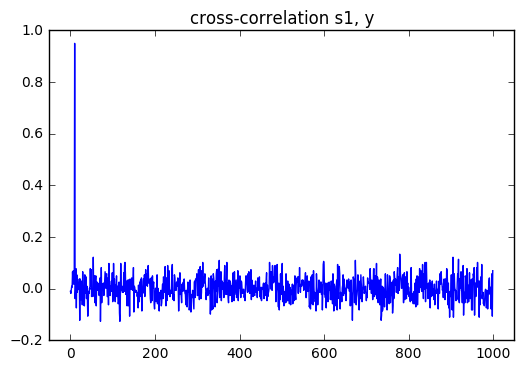

10


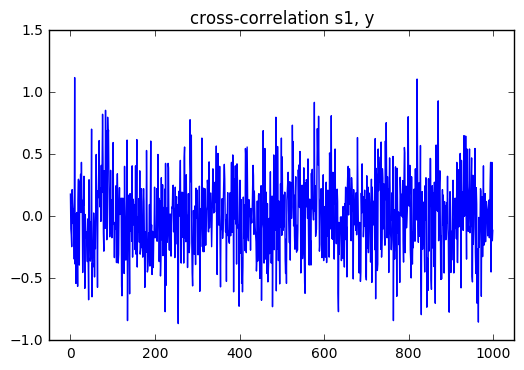

In [19]:
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + n
corr = cross_corr(s1, y)
plt.title("cross-correlation s1, y")
plt.plot(corr)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

print(np.argmax(corr))

s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 10*n
corr = cross_corr(s1, y)
plt.title("cross-correlation s1, y")
plt.plot(corr)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# (f)

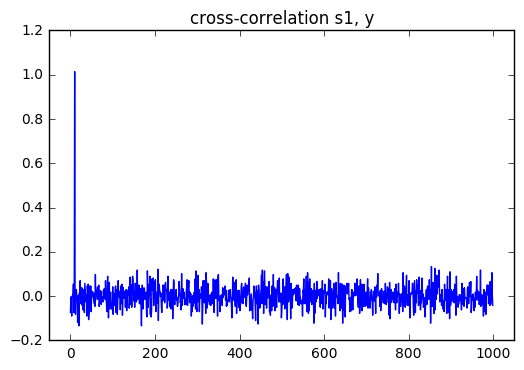

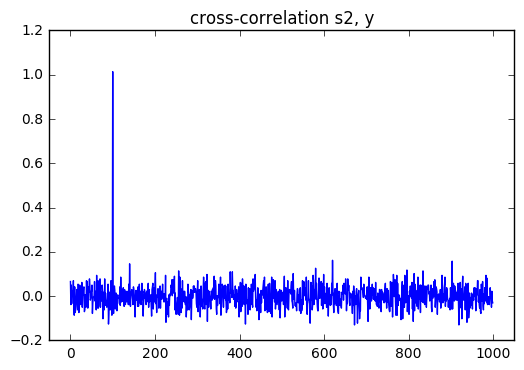

10 100


In [20]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

j = np.argmax(corr_s1_y) # find the first signal delay (max index of correlation)
k = np.argmax(corr_s2_y) # find the second signal delay
print(j,k)

# (g)
This is the same code as part (f), but with slight modification to how the received signal y generated.
Run the below cell a few times to test for different choices of random signals.

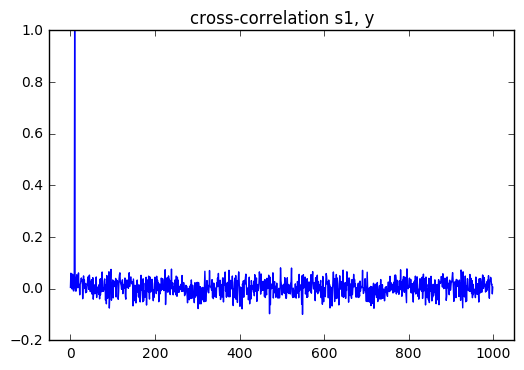

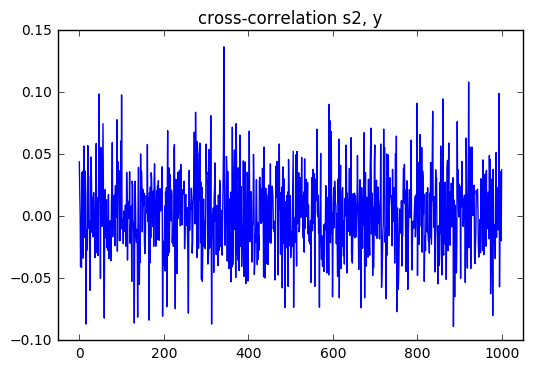

In [21]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + 0.1*np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# (h)

10


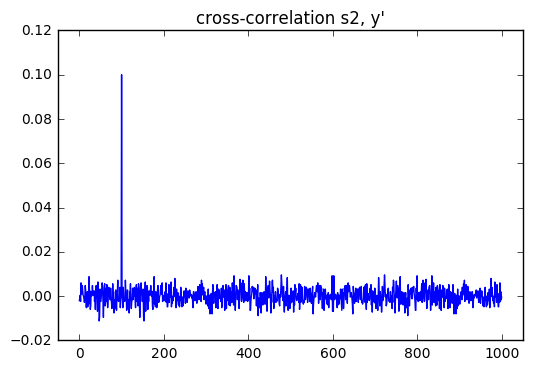

100


In [22]:
corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay
print(j)

# subtract out the contribution of the first signal
y_prime = y - np.roll(s1, j)

# correlate the residual against the second signal
corr_s2_y = cross_corr(s2, y_prime)

# Plot 
plt.title("cross-correlation s2, y'")
plt.plot(corr_s2_y)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

k = np.argmax(corr_s2_y) # find the second signal delay by looking at the index of max correlation
print(k)

# (i)

In [23]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100)

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.683 0.4762


# (j)
This is the same code as part (i), but with noise added to the received signal $\vec{y}$.

In [24]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)
n = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100) + 0.1*n

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.6968 0.4992
